In [1]:
import helper_tools as ht
import plume_tools as pt
import assimilation_tools as at
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [5]:
setting_golem = ht.SettingsGolem(settings_to_override={"endtime":30, "radius":50})

In [6]:
nature_list,ens_list,emis_list,time_list = ht.run_with_assimilation(setting_golem,halg='one')

Running model from 0 to 10
Assimilating data at time 10
Running model from 10 to 20
Assimilating data at time 20
Running model from 20 to 30
Assimilating data at time 30


In [21]:
model_emis = np.repeat(emis_list[:,:,20,20],setting_golem.getSetting('window'),axis=1)
base_emis_field = setting_golem.makeBaseField()
emis_t = setting_golem.makeEmis(isConst=False)
nature_emis = np.array([emis_t(t, base_emis_field) for t in np.unique(time_list)])
plottime = np.unique(time_list)

Text(0, 0.5, 'Emissions')

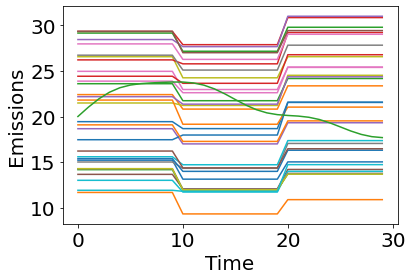

In [22]:
endval = setting_golem.getSetting('endtime')+1
plt.rcParams.update({'font.size': 20})

for i in range(setting_golem.getSetting('n_ens')):
  plt.plot(plottime[0:endval-1],model_emis[i,0:endval-1],label='ensemble')
plt.plot(plottime[0:endval-1],nature_emis[0:endval-1,20,20],label='nature')
plt.xlabel('Time')
plt.ylabel('Emissions')
#plt.legend()

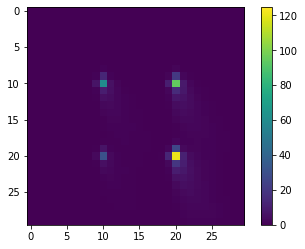

In [10]:
def animate(i):
  im.set_array(np.mean(ens_list[:,i,:,:],axis=0))
  return [im]

fig, ax = plt.subplots()
im = ax.imshow(np.mean(ens_list[:,0,:,:],axis=0), animated=True)
im.set_clim(np.min(np.mean(ens_list,axis=0)), np.max(np.mean(ens_list,axis=0)))
plt.colorbar(im);
anim = animation.FuncAnimation(fig, animate,np.shape(ens_list)[0],interval=50, blit=False)

HTML(anim.to_html5_video())

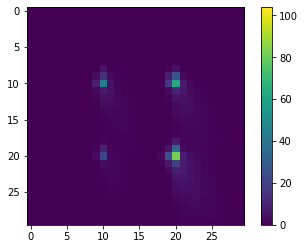

In [11]:
def animate(i):
  im.set_array(nature_list[i,:,:])
  return [im]

fig, ax = plt.subplots()
im = ax.imshow(nature_list[0,:,:], animated=True)
im.set_clim(np.min(nature_list), np.max(nature_list))
plt.colorbar(im);
anim = animation.FuncAnimation(fig, animate,np.shape(nature_list)[0],interval=50, blit=False)

HTML(anim.to_html5_video())

In [ ]:
velx = setting_golem.makeVel('x',useNoise = True)
vely = setting_golem.makeVel('y',useNoise = True)

In [ ]:
x = np.linspace(0,10,51)
y = np.array([velx(x_val) for x_val in x])

In [ ]:
plt.plot(x,y)

In [ ]:
basefield = setting_golem.makeBaseField()
nature_emis_func = setting_golem.makeEmis(isConst=False)

In [ ]:
x = np.linspace(0,10,51)
y = np.array([nature_emis_func(x_val,basefield) for x_val in x])

In [ ]:
plt.plot(x,y[:,14,14])

In [ ]:
plt.imshow(nature[2,:,:])
plt.colorbar()

In [ ]:
test = nature_list[100,:,:]

In [ ]:
np.mean(test)

In [ ]:
np.shape(test)

In [ ]:
test = np.tile(np.arange(0,30),30)

In [ ]:
np.mean([0,30-1])

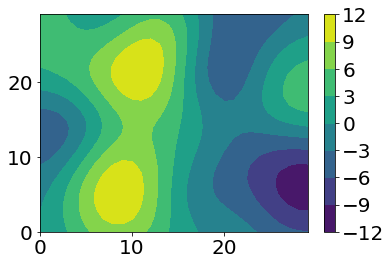

In [27]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Compute filter kernel with radius correlation_scale (can probably be a bit smaller)
correlation_scale = 20
x = np.arange(-correlation_scale, correlation_scale)
y = np.arange(-correlation_scale, correlation_scale)
X, Y = np.meshgrid(x, y)
dist = np.sqrt(X*X + Y*Y)
filter_kernel = np.exp(-dist**2/(2*correlation_scale))

# Generate n-by-n grid of spatially correlated noise
n = 30
noise = np.random.randn(n, n)
noise = scipy.signal.fftconvolve(noise, filter_kernel, mode='same')
plt.contourf(np.arange(n), np.arange(n), noise)
plt.colorbar()

In [30]:
np.std(noise)

5.218385901504168

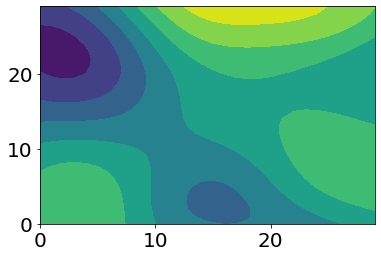

In [77]:
import scipy.stats
import numpy as np
import scipy.spatial.distance
import matplotlib.pyplot as plt

# Create a 50-by-50 grid; My actual grid will be a LOT larger
X,Y = np.meshgrid(np.arange(30),np.arange(30))

# Create a vector of cells
XY = np.column_stack((np.ndarray.flatten(X),np.ndarray.flatten(Y)))

# Calculate a matrix of distances between the cells
dist = scipy.spatial.distance.pdist(XY)
dist = scipy.spatial.distance.squareform(dist)

# Convert the distance matrix into a covariance matrix
correlation_scale = 50
cov = 10**2*np.exp(-dist**2/(2*correlation_scale)) # This will do as a covariance matrix

# Sample some noise !slow!
noise = scipy.stats.multivariate_normal.rvs(
        mean = np.zeros(30**2),
        cov = cov)

# Plot the result
plt.contourf(X,Y,noise.reshape((30,30)))

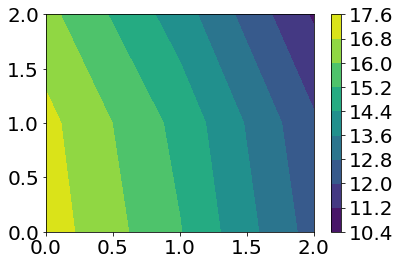

In [74]:
plt.contourf(X,Y,noise.reshape((3,3)))
plt.colorbar()

In [79]:
noise = scipy.stats.multivariate_normal.rvs(
        mean = np.zeros(30**2),
        cov = cov)


In [55]:
dist[0,255]

7.0710678118654755

In [56]:
np.sqrt(50)

7.0710678118654755

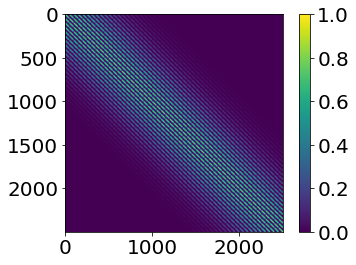

In [35]:
plt.imshow(cov)
plt.colorbar()

In [38]:
np.shape(dist)

(2500, 2500)

In [57]:
test = [[14,14],[15,16]]

In [63]:
xinds = np.array([val[0] for val in test])
yinds = np.array([val[1] for val in test])

In [65]:
yinds

array([14, 16])

In [66]:
test = np.random.rand(30,30)

In [68]:
test[xinds,yinds]

array([0.24908552, 0.87163465])

In [71]:
test[15,16]

0.8716346536553302

In [72]:
type(1) is int

True

In [81]:
np.random.normal(0,1)

1.6500841099896644